[*********************100%%**********************]  1 of 1 completed
c:\Users\gokub\ex\journey\Lib\site-packages\sklearn\preprocessing\_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


0.9964326832469006 [235.00447848 229.55533257 232.55221189 236.46011162 236.8775329
 230.87940048 226.13127192 226.28330002 225.93068787 226.97659499] 10


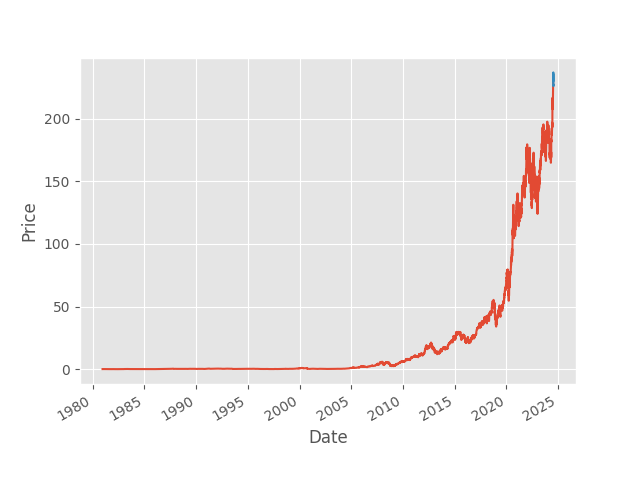

In [1]:
%matplotlib widget
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style 
import numpy as np
from sklearn import preprocessing, svm, model_selection
from sklearn.linear_model import LinearRegression
import pandas as pd
import yfinance as yf
import math
import mplfinance as mpf
import pickle

pd.options.mode.chained_assignment = None

style.use('ggplot')
df = yf.download("AAPL", auto_adjust=True)
df['HL_PCT'] = (df['High'] - df['Low']) / df['Low'] * 100
df['OC_PCT'] = (df['Open'] - df['Close']) / df['Close'] * 100
df = df[['Close', 'HL_PCT', 'OC_PCT', 'Volume']]
forecast_col = 'Close'
df.fillna(-9999)

forecast_out = int(math.ceil(0.0009*len(df)))

df['Label'] = df[forecast_col].shift(-forecast_out)

# Features 
X = np.array(df.drop(['Label'], axis=1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
# Labels
y = np.array(df['Label'])



X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# Training
clf = LinearRegression()
clf.fit(X_train, y_train)

with open('LinearRegression', 'wb') as f:
    pickle.dump(clf, f)

with open('LinearRegression', 'rb') as file:
    clf = pickle.load(file)

# Testing
accuracy = clf.score(X_test, y_test)

# Prediction
forecast_set = clf.predict(X_lately)
print(accuracy, forecast_set, forecast_out)
df['Future'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp() # Current date from date time to timestamp (unix)
one_day = 86400 # One day in seconds
next_unix = last_unix + one_day

# Creating rows for predicted data
for i in forecast_set: 
    next_date = dt.datetime.fromtimestamp(next_unix) # Accessing created timestamp
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Close'].plot()
df['Future'].plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()



(0.42857142857142866, 4.0)
